<hr style="border:2px solid #FEC60D"> </hr>
<center><h1 style="color:#173F8A;"> Algebra Lineal Aplicada para Ciencia de Datos</h1></center> 
<center><h1 style="color:#173F8A;"> MDS3120</h1></center>
<hr style="border:2px solid #FEC60D"> </hr>
<h3 style="color:#0176DE;text-align:right;"> Profesores: &nbsp;Manuel A. Sanchez<br>Carlos Sing-Long<br></h3>

<h3 style="color:#03122E;text-align:right;"> 
    Magister en Ciencia de Datos - MDS <br> 
    Instituto de Ingenieria Matematica y Computacional - IMC<br>  
    Pontificia Universidad Catolica de Chile <br>   
</h3>

<hr style="border:2px solid #03122E"> </hr>
<center><h1 style="color:#173F8A;"> Tutorial 3: Bases ortonormales</h1></center> 
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->

## **Contenidos**

1. [**Tutorial:** La base de coseno discreta](#Tutorial:-La-base-de-coseno-discreta)
   1. [La base de coseno discreto](#La-base-de-coseno-discreto)
   2. [Cargando datos de audio](#Cargando-datos-de-audio)
   3. [Representando audio en la base de coseno discreto](#Representando-audio-en-la-base-de-coseno-discreto)
   4. [Modificando audio](#Modificando-audio)
2. [**Tutorial:** La base de wavelets de Haar](#Tutorial:-La-base-de-wavelets-de-Haar)
   1. [La base de wavelets de Haar](#La-base-de-wavelets-de-Haar)
   2. [Representando imagenes en la base de wavelets de Haar](#Representando-imagenes-en-la-base-de-wavelets-de-Haar)
   3. [_Sparsity_](#Sparsity)

In [1]:
# imports
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from itertools import product

## **Tutorial:** La base de coseno discreto

### La base de coseno discreta

La base del coseno discreta en $\mathbb{R}^d$ es una **base ortonormal** consistente de los vectores $v_1,\ldots, v_d$ con componentes
$$
    v_{k,i} = \begin{cases}
            \sqrt{\frac{1}{d}} & k = 1 \\ 
            \sqrt{\frac{2}{d}}\cos\left[\frac{\pi}{d} \left(i - \frac{1}{2}\right)k\right] & k\in\{2,\ldots, d\}
        \end{cases}
$$

Podemos visualizar estos vectores en dimensión $d = 32$.

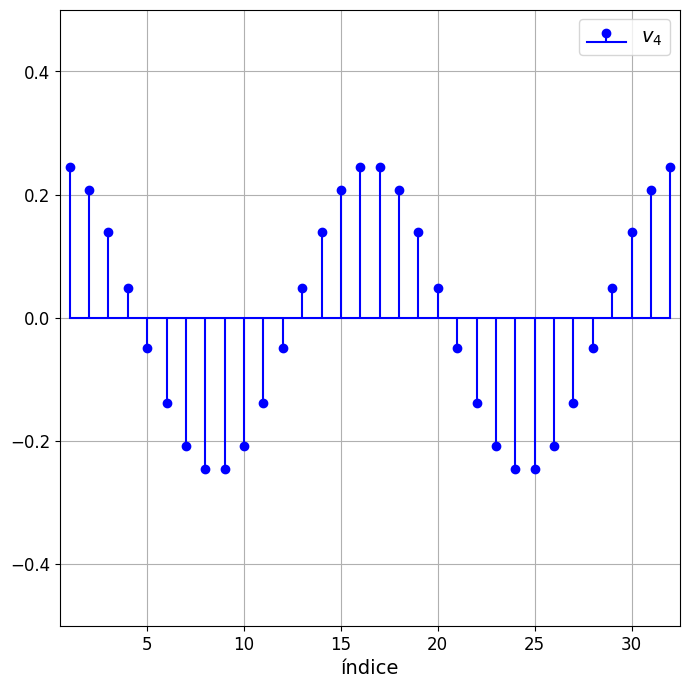

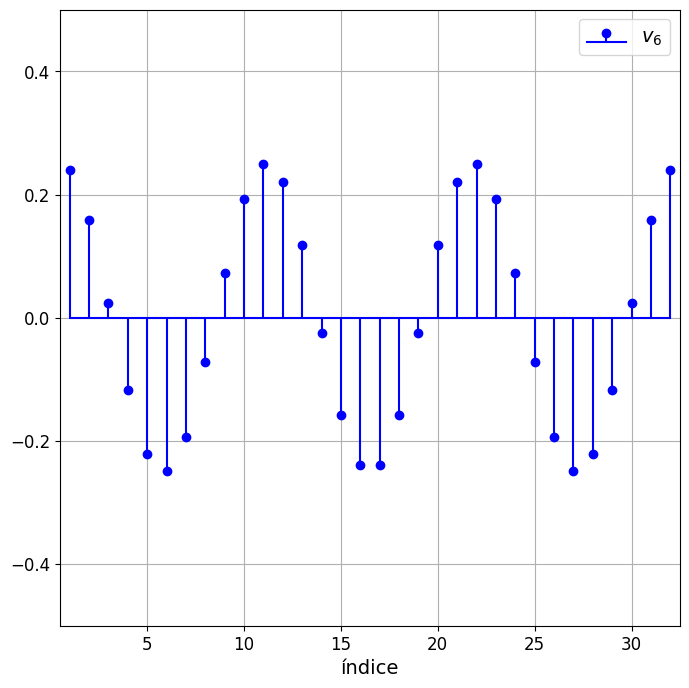

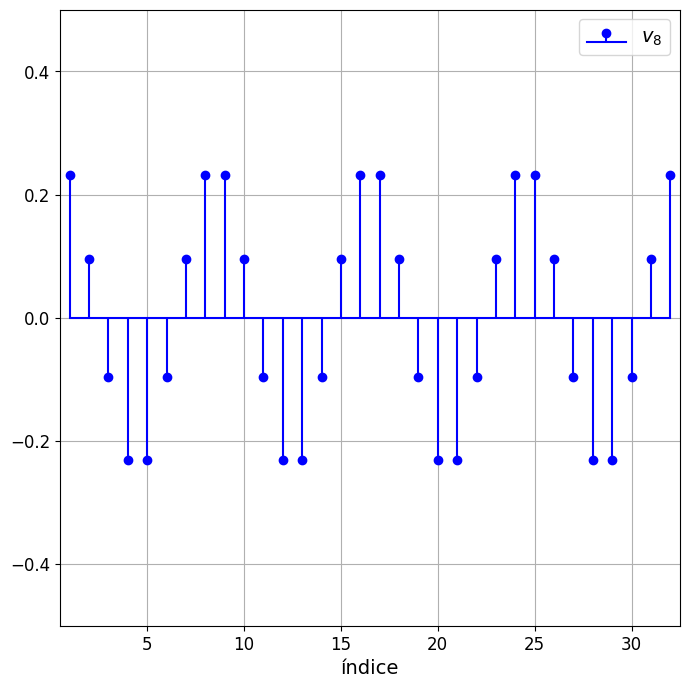

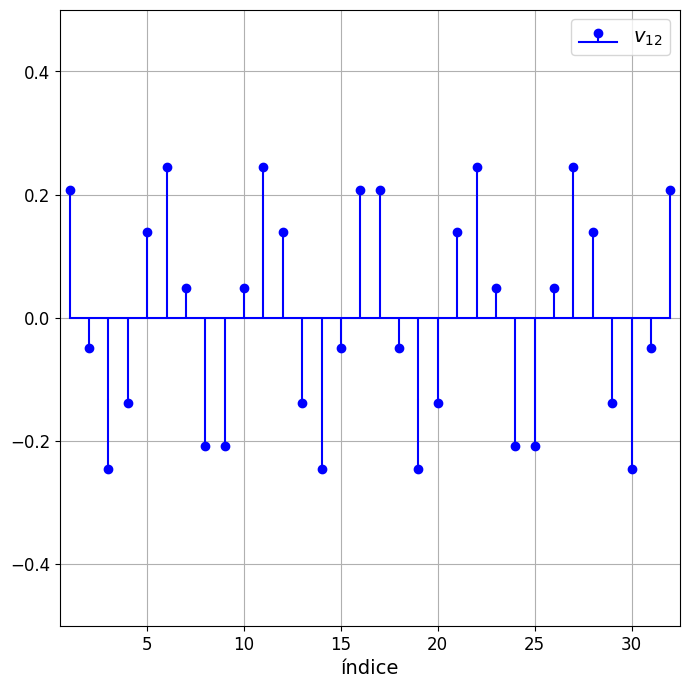

In [2]:
# dimension
d = 32
# elementos de la base a graficar
k = [ 4, 6, 8, 12 ]

for _k in k:
    n = np.linspace(1, d, d)
    if _k == 1:
        v = np.sqrt(1/d) * np.ones((d,))
    else:
        v = np.sqrt(2/d) * np.cos(np.pi * (n - 1/2) * _k / d)

    plt.figure(figsize=(8, 8))
    plt.stem(n, v, label='$v_{{{:d}}}$'.format(_k), basefmt='b-', linefmt='b-', markerfmt='bo')
    plt.xlim([ 0.5, d + 0.5 ])
    plt.ylim([ -0.5, 0.5 ])
    plt.grid(True)
    plt.legend(fontsize=14, loc='upper right')
    plt.xlabel('índice', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

Cuando la dimensión aumenta, podemos visualizar estos vectores como señales. Mostramos a continuación los vectores de esta base en dimensión $d = 65536$.

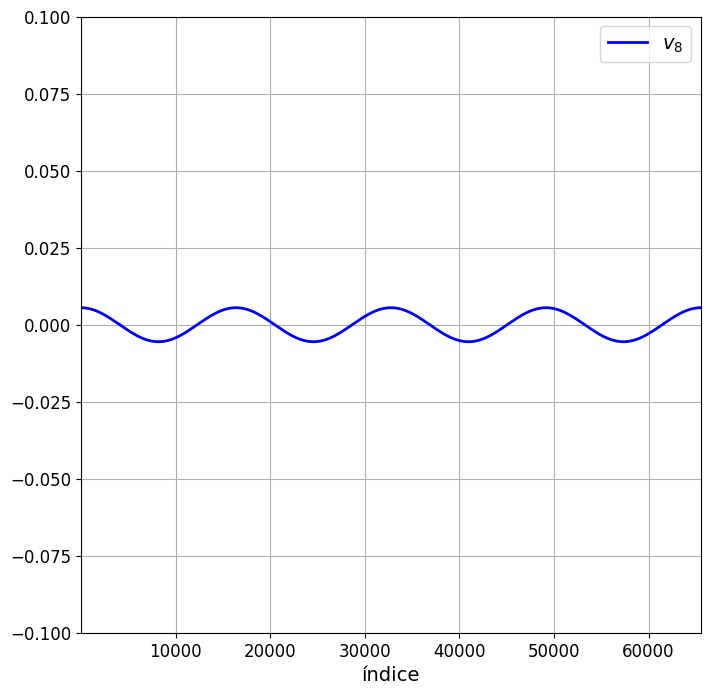

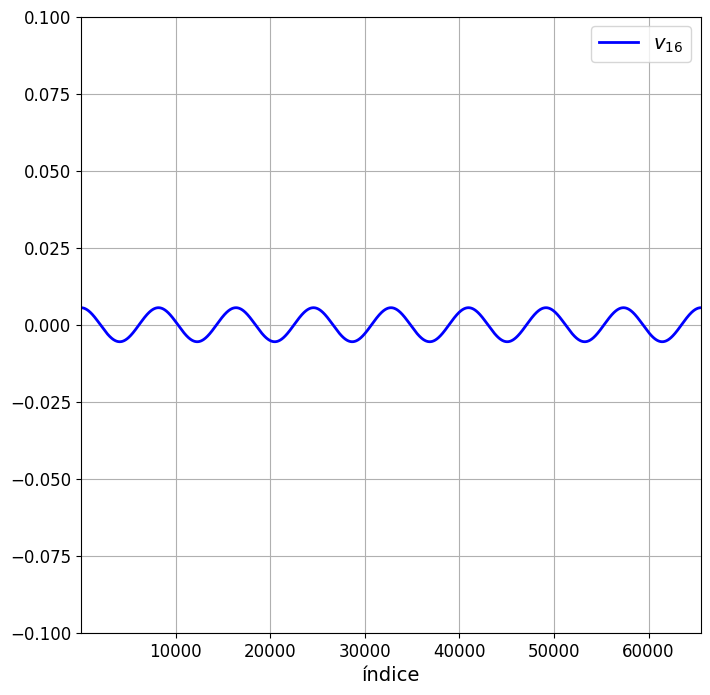

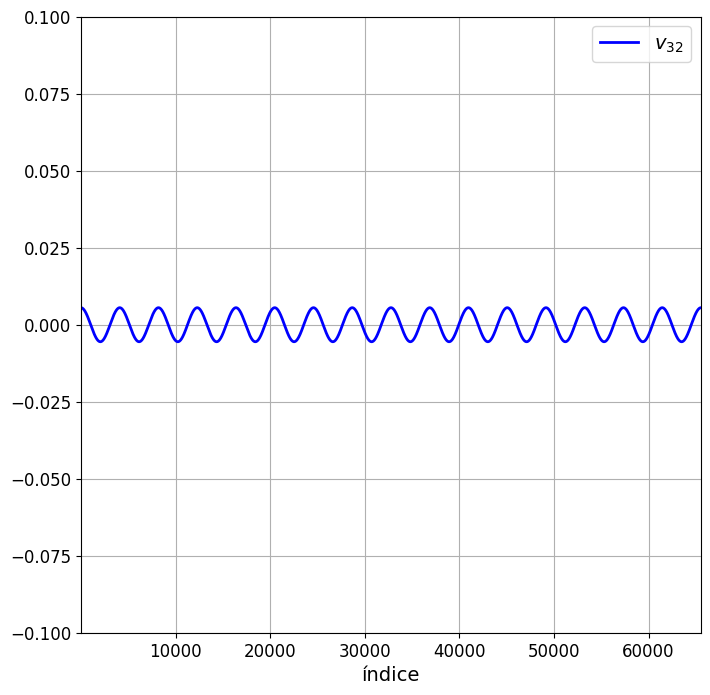

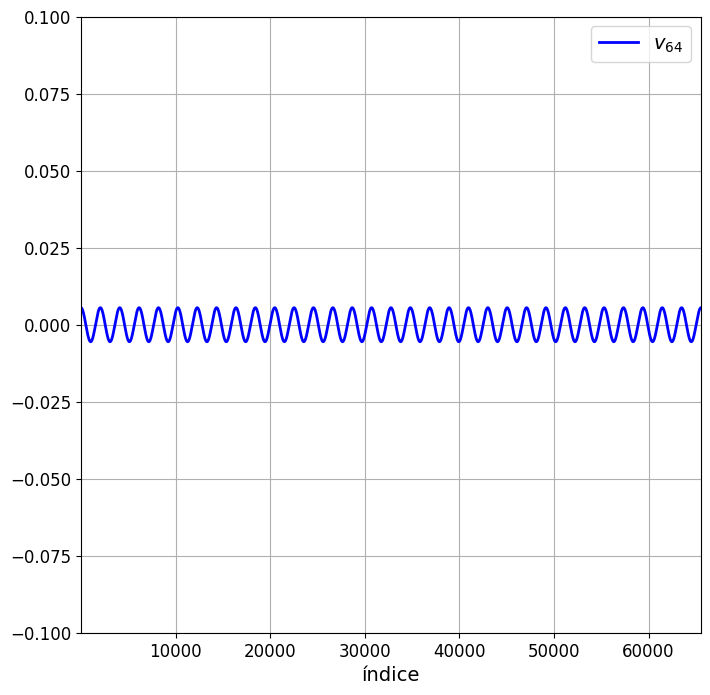

In [3]:
# dimension
d = 65536
# elementos de la base a graficar
k = [ 8, 16, 32, 64 ]

for _k in k:
    n = np.linspace(1, d, d)
    if _k == 1:
        v = np.sqrt(1/d) * np.ones((d,))
    else:
        v = np.sqrt(2/d) * np.cos(np.pi * (n - 1/2) * _k / d)

    plt.figure(figsize=(8, 8))
    plt.plot(n, v, label='$v_{{{:d}}}$'.format(_k), linewidth=2, color='b')
    plt.xlim([ 0.5, d + 0.5 ])
    plt.ylim([ -0.1, 0.1 ])
    plt.grid(True)
    plt.legend(fontsize=14, loc='upper right')
    plt.xlabel('índice', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

Cada uno de los elementos de esta base se asemeja a una señal sinusoidal. Esto corresponde perceptualmente a un **tono puro**. En efecto, si grabamos esta señal en un formato de audio usando la librería ``soundfile`` podemos escuchar el audio correspondiente a cada elemento de la base.

In [4]:
# para procesar audio
import soundfile
# frecuencia de muestreo (Hz)
fs = 44100
# elementos de la base a graficar
k = [ 256, 512, 1024, 2048 ]

for _k in k:
    n = np.linspace(1, d, d)
    if _k == 1:
        v = np.sqrt(1/d) * np.ones((d,))
    else:
        v = np.sqrt(2/d) * np.cos(np.pi * (n - 1/2) * _k / d)
    # normalizar a amplitud 1
    v = v/np.abs(v).max()
    # guardar archivo de audio
    soundfile.write(f'MDS3120_AUDIO_D{d}_K{_k}.wav', v, fs)

### Cargando datos de audio

Podemos descomponer una señal de audio en la base de coseno discreta para así analizar su **contenido en frecuencia**.

Para cargar un archivo de audio usamos nuevamente la librería ``soundfile``.

Informacion
Frecuencia de muestreo (Hz)  :  44100
Muestras                     :  464256
Intervalo (s)                :  10.52732426303855


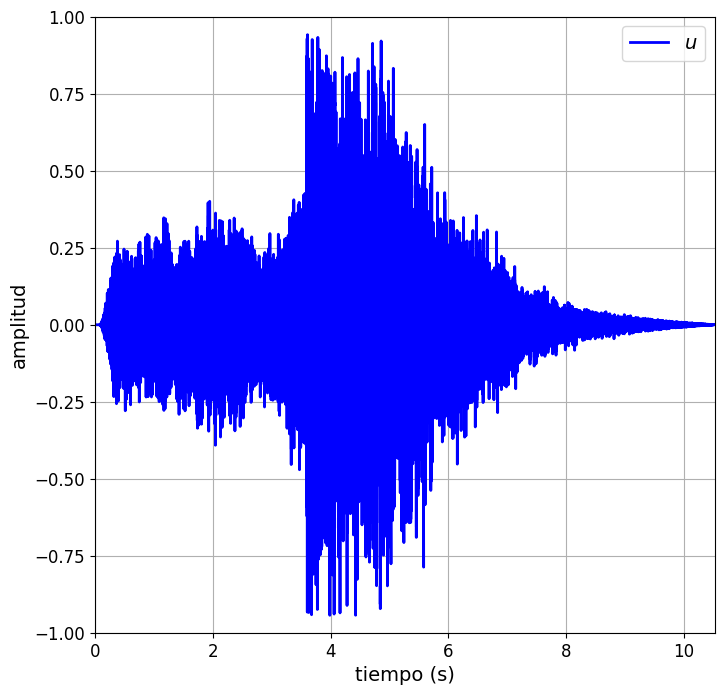

In [5]:
# la función soundfile.read retorna
#   u en una tupla con 2 elementos
#       un arreglo de N x C con muestras de audio
#           N es el número de muestras
#           C es el número de canales
#       la frecuencia de muestreo en Hz
# IMDS3120_AUDIO_CLIP.wav es monoaural y tiene sólo un canal
u = soundfile.read('MDS3120_AUDIO_CLIP.wav')

# frecuencia de muestreo de la señal (Hz)
fs = u[1]
# señal monoaural
u = u[0]
# número de muestras
num_t = u.size
# intervalo de tiempo
t_max = (num_t-1) / fs
# periodo de muestreo
dt = 1/fs
# instantes de muestreo
t = np.array([ I * dt for I in range(num_t) ])

print('Informacion')
print('Frecuencia de muestreo (Hz)  : ', fs)
print('Muestras                     : ', num_t)
print('Intervalo (s)                : ', t_max)


plt.figure(figsize=(8, 8))
plt.plot(t, u, label='$u$', linewidth=2, color='b')
plt.xlim([ 0.0, t_max ])
plt.ylim([ -1.0, +1.0 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('tiempo (s)', fontsize=14)
plt.ylabel('amplitud', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Representando audio en la base de coseno discreto

Ya que la base de coseno discreta es **ortonormal** la $k$-ésima coordenada de un vector $u$ cualquiera es
$$
    c_k = v_k \cdot u
$$
En vez de calcular el producto interior de la señal de audio con cada uno de los elementos de la base, usamos la función ``scipy.fft.dct`` con los parámetros ``type=2`` y ``norm='ortho'``. Esta función permite calcular de forma eficiente las coordenadas en muy altas dimensiones.

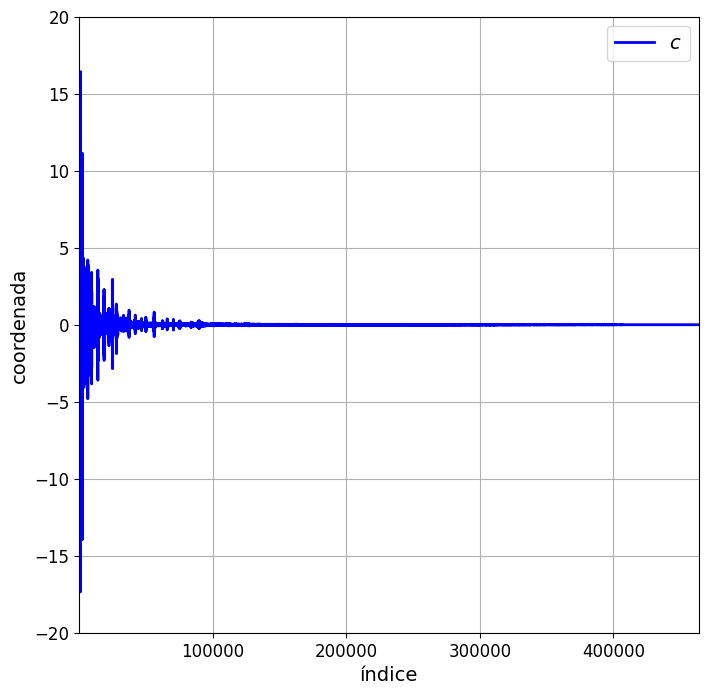

In [6]:
# importamos la función
from scipy.fft import dct
# coordenadas de u en la base del coseno discreto
cu = dct(u, type=2, norm='ortho')
# indices de las coordenadas
n = np.linspace(1, num_t, num_t)

plt.figure(figsize=(8, 8))
plt.plot(n, cu, label='$c$', linewidth=2, color='b')
plt.xlim([ 1, num_t ])
plt.ylim([ -20, +20 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('índice', fontsize=14)
plt.ylabel('coordenada', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Modificando audio

Las coordenadas nos indican la contribución de cada elemento de la base al vector $u$ representando la señal de audio. Por lo tanto, modificando las coordenadas podemos modificar las propiedades de la señal de audio. Si escalamos cada coordenada
$$
    c_k \mapsto h_k c_k
$$
para algunos escalares $h_1,\ldots, h_d$ podemos luego sintentizar la señal de audio
$$
    w = \sum_{k=1}^d h_k c_k v_k
$$
Para tomar la combinación lineal de los elementos de la base de coseno discreto usamos la función ``scipy.fft.idct`` con los parámetros ``type=2`` y ``norm='ortho'``.

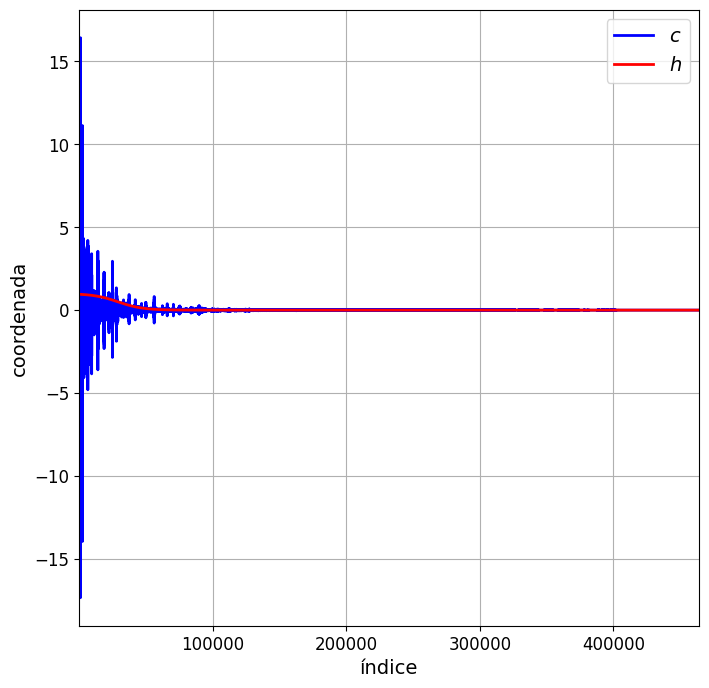

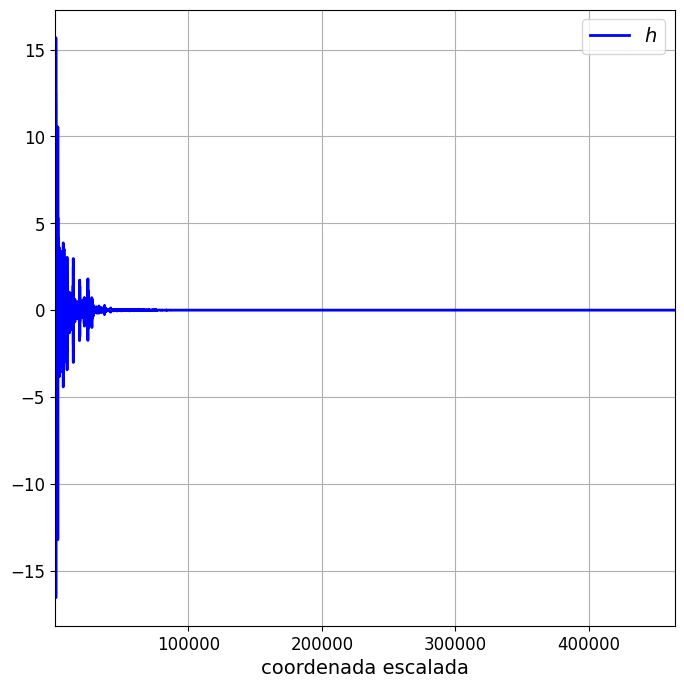

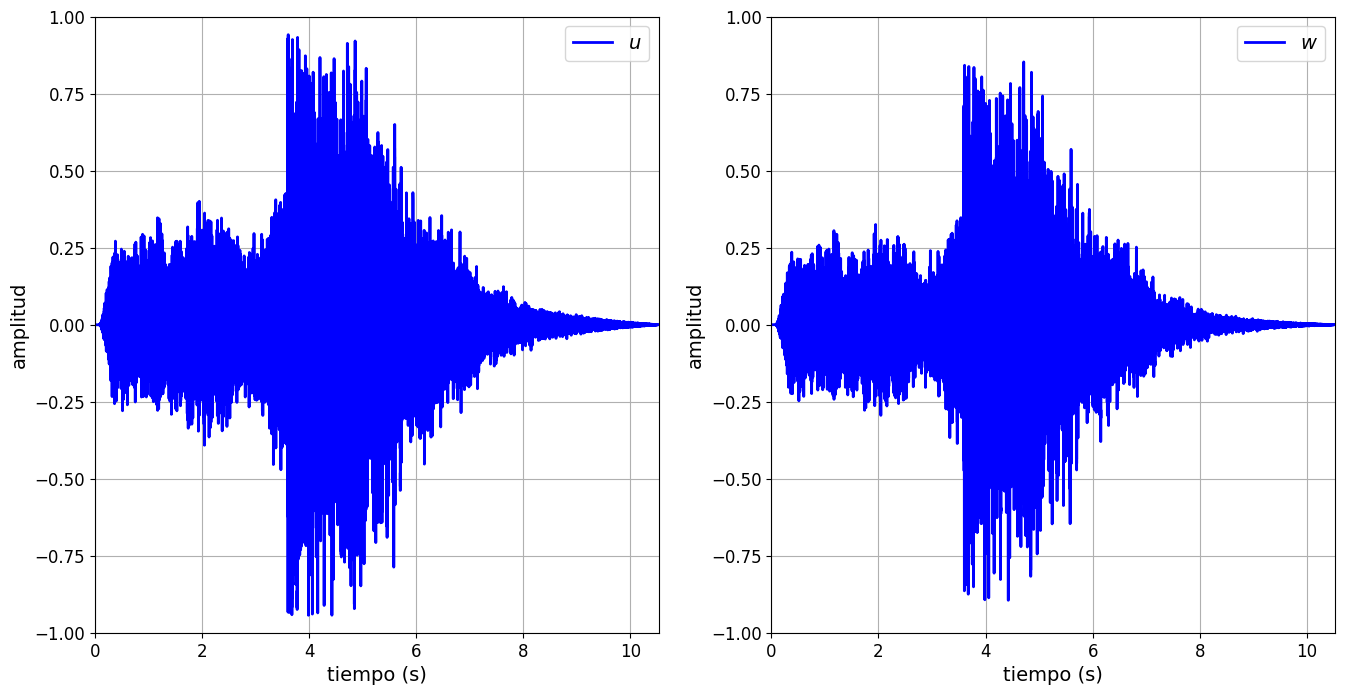

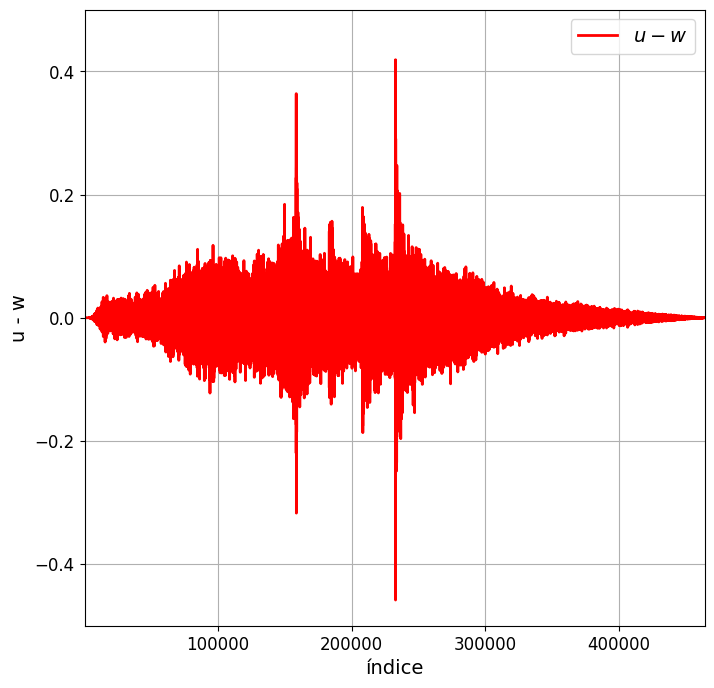

In [7]:
# parámetro de concentración
a = 50/num_t
# índice de corte
nc = num_t/16
h = np.exp(-a * (n - nc)) / (1 + np.exp(-a * (n - nc)))
# importamos la función
from scipy.fft import idct
# sintetizamos la nueva señal de audio
w = idct(h * cu, type=2, norm='ortho')
# grabamos la señal de audio
soundfile.write('MDS3120_AUDIO_CLIP_FILTER.wav', w, fs)


plt.figure(figsize=(8, 8))
plt.plot(n, cu, label='$c$', linewidth=2, color='b')
plt.plot(n, h, label='$h$', linewidth=2, color='r')
plt.xlim([ 1, num_t ])
# plt.ylim([ -1.0, +1.0 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('índice', fontsize=14)
plt.ylabel('coordenada', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(n, h * cu, label='$h$', linewidth=2, color='b')
plt.xlim([ 1, num_t ])
# plt.ylim([ -1.0, +1.0 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('índice', fontsize=14)
plt.xlabel('coordenada escalada', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(t, u, label='$u$', linewidth=2, color='b')
plt.xlim([ 0.0, t_max ])
plt.ylim([ -1.0, +1.0 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('tiempo (s)', fontsize=14)
plt.ylabel('amplitud', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplot(1, 2, 2)
plt.plot(t, w, label='$w$', linewidth=2, color='b')
plt.xlim([ 0.0, t_max ])
plt.ylim([ -1.0, +1.0 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('tiempo (s)', fontsize=14)
plt.ylabel('amplitud', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(n, u - w, label='$u - w$', linewidth=2, color='r')
plt.xlim([ 1, num_t ])
plt.ylim([ -0.5, +0.5 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('índice', fontsize=14)
plt.ylabel('u - w', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## **Tutorial:** La base de wavelets de Haar

### La base de wavelets de Haar

La base de wavelets de Haar es una **base ortonormal** del espacio de imágenes de $N\times N$ pixeles. En general se asume que $N$ es una **potencia de dos**.

Cada elemento de la base de wavelets de Haar captura una **oscilación** en una **escala** y **posición** determinada.  El espacio de imágenes de $N\times N$ pixeles tiene dimensión $d = N^2$. Por lo tanto, la base de wavelets de Haar tiene $N^2$ elementos. Cuando $N$ es una potencia de dos, el número de escala es $\log_2(N)$. 

Visualizamos los elementos de la base de Haar para una imagen de $8\times 8$ pixeles. Para ello, usamos el paquete ``pywavelets``.

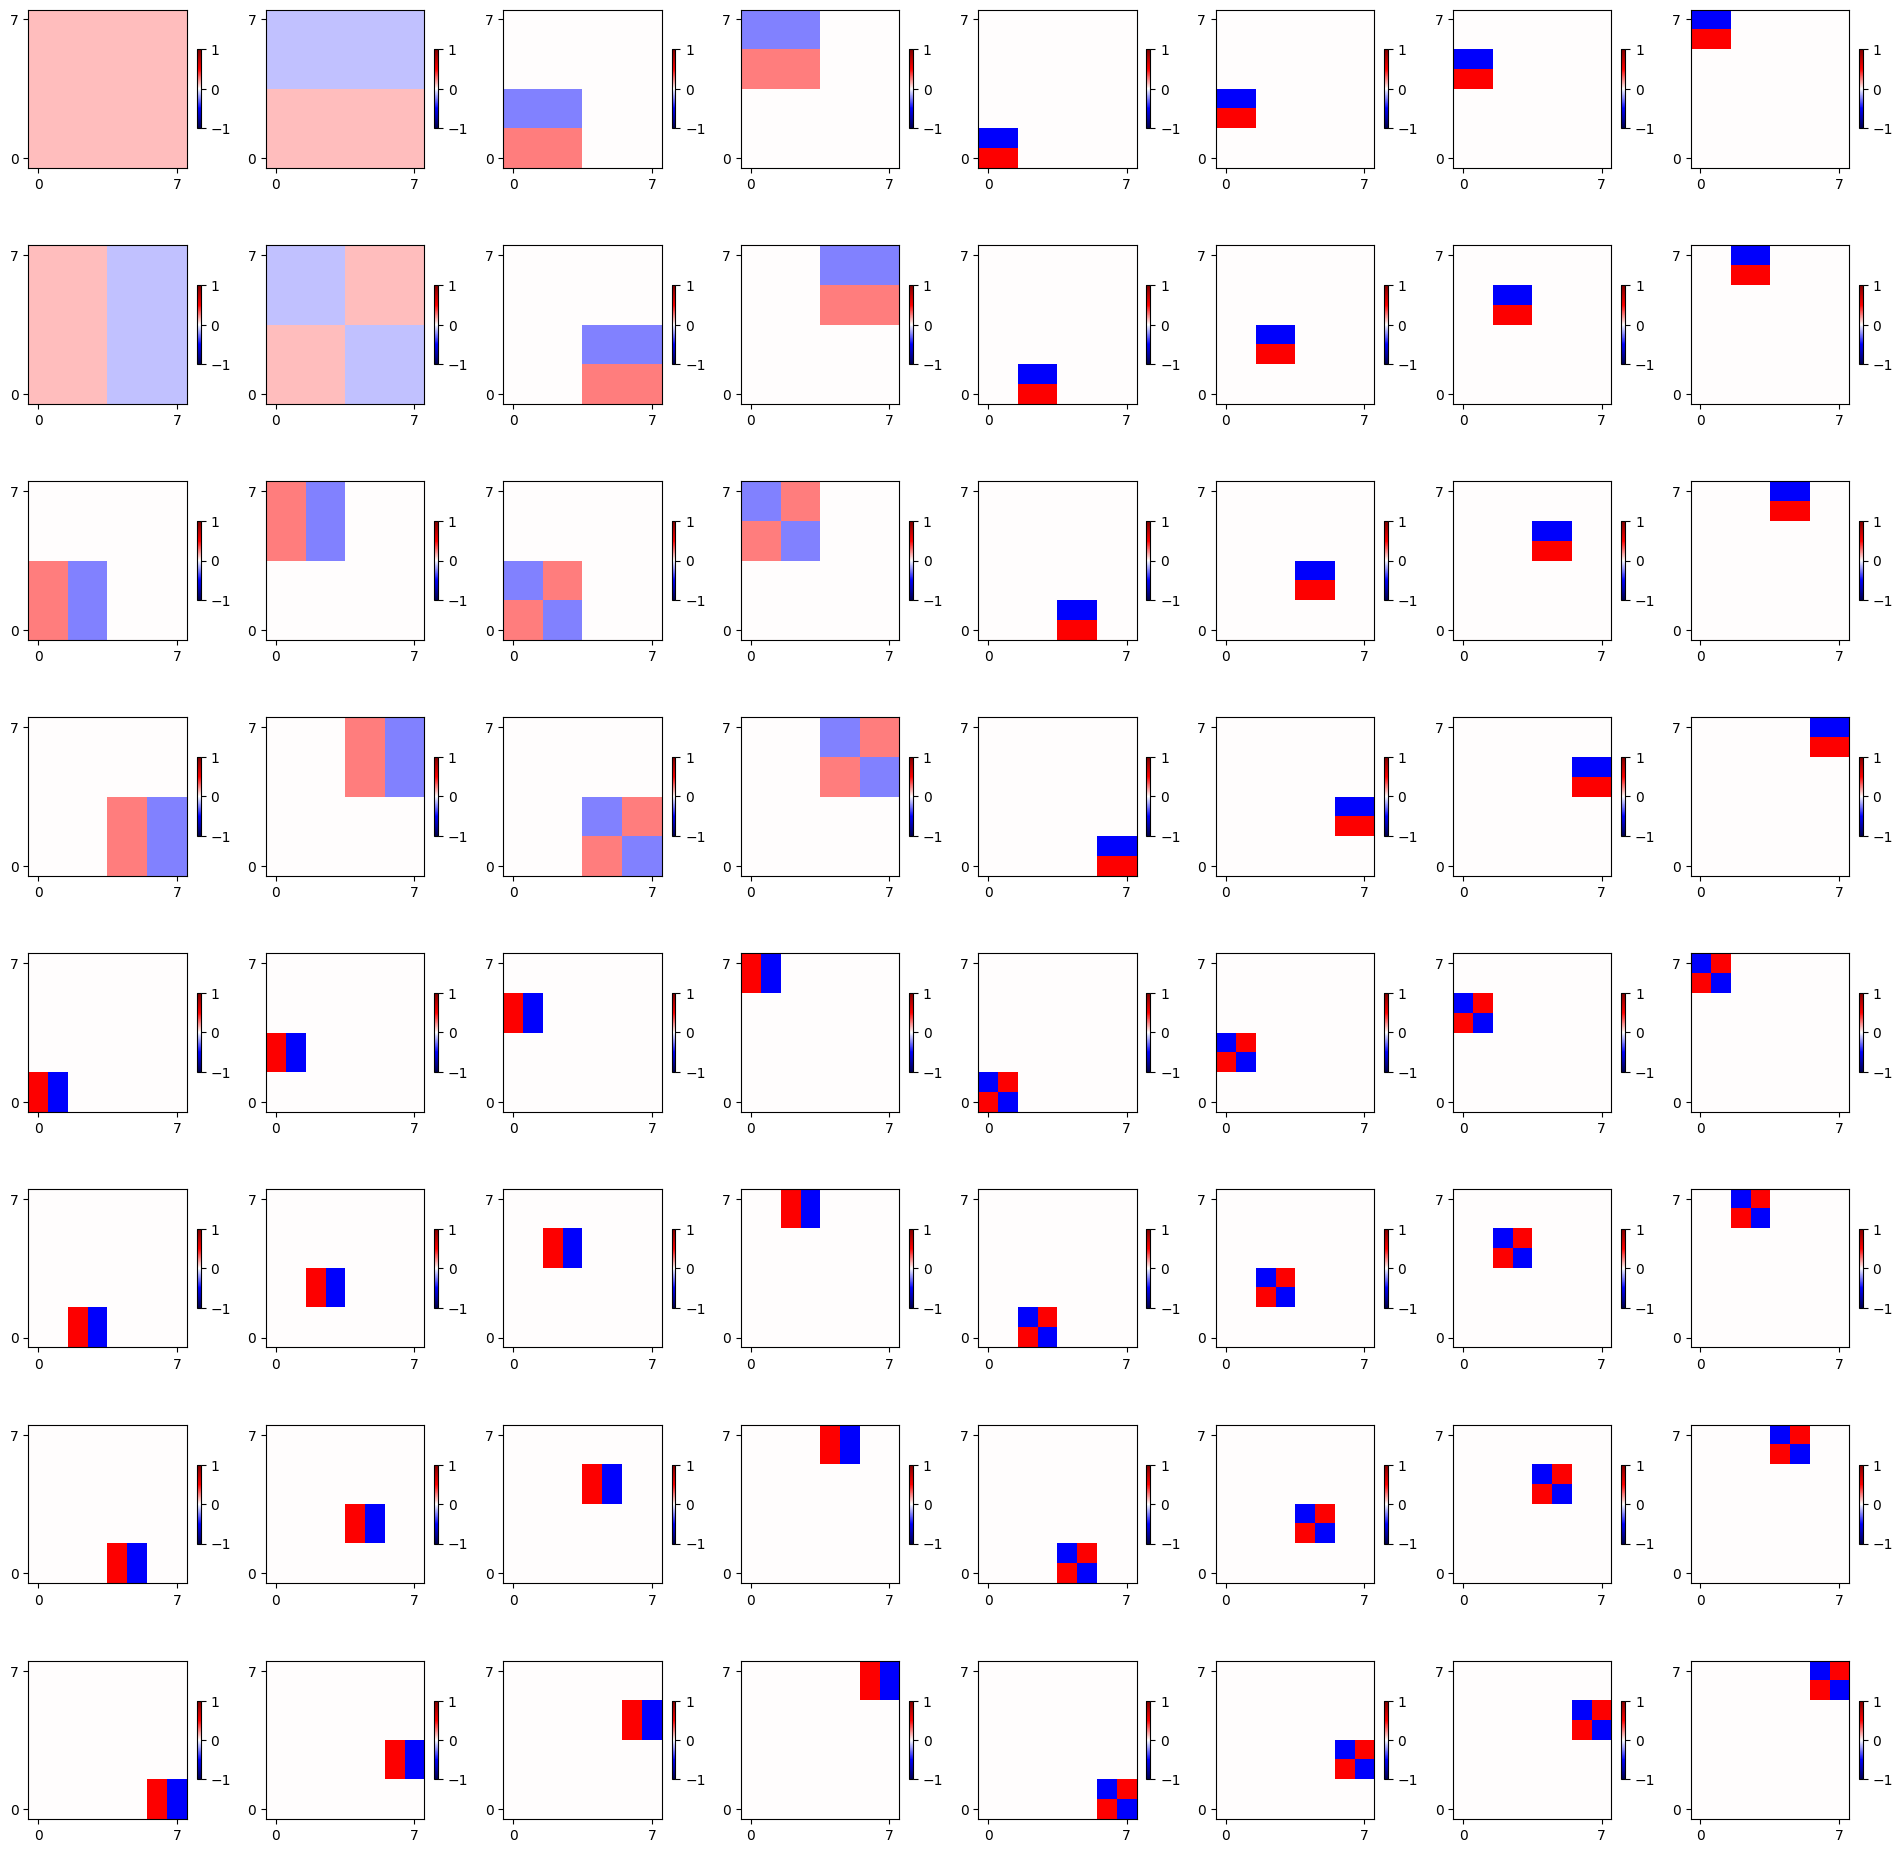

In [8]:
# importamos el paquete pywavelets
import pywt as pywt
# valor de N
N = 8
# esta porcion de codigo determina algunas variables auxiliares
WX = pywt.wavedec2(np.zeros((N, N)), 'haar', mode='periodic', level=None)
WX, BWX = pywt.coeffs_to_array(WX)
# graficamos los elementos de la base
plt.figure(figsize=(24, 24))
for I, J in product(range(N), range(N)):
    WX[I, J] = 1
    X = pywt.waverec2(pywt.array_to_coeffs(WX, BWX, output_format='wavedec2'), 'haar', mode='periodic')
    WX[I, J] = 0

    plt.subplot(N, N, 1 + I + N * J)
    plt.imshow(X, vmin=-1.0, vmax=+1.0, origin='lower', cmap='seismic')
    plt.xticks([ 0, N - 1 ])
    plt.yticks([ 0, N - 1 ])
    plt.colorbar(shrink=0.4)
plt.show()


### Representando imagenes en la base de wavelets de Haar

Cargamos una imagen de $512\times 512$ pixeles usando ``pyplot.imread`` para luego encontrar sus coordenadas en la base de wavelets de Haar usando ``pywavelets.wavedec2`` con los parámetros ``haar`` y ``mode=periodic``.

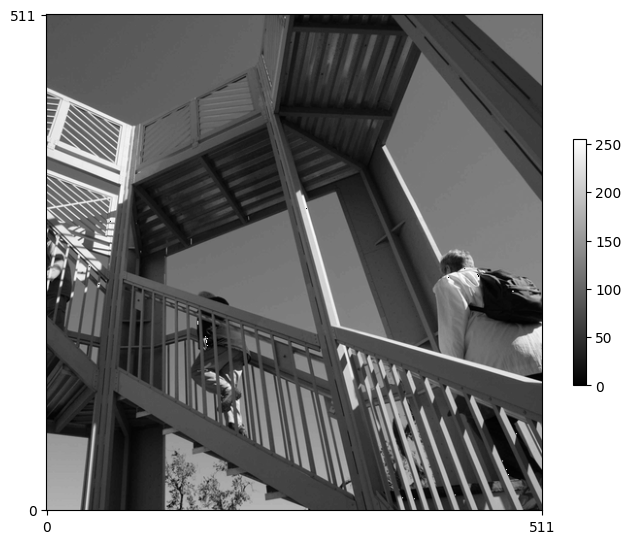

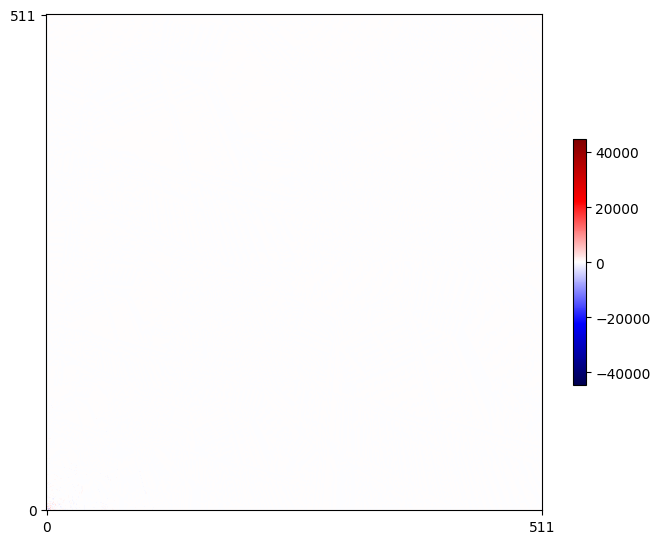

In [9]:
# importamos ejemplos
import pywt.data
# imagen
X = np.flipud(pywt.data.ascent())
# número de pixeles
N = X.shape[0]
# coordenadas de X en la base de wavelets de Haar
WX = pywt.wavedec2(X, 'haar', mode='periodic', level=None)
WX, BWX = pywt.coeffs_to_array(WX)
wx_max = np.abs(WX).max()

plt.figure(figsize=(8, 8))
plt.imshow(X, origin='lower', cmap='gray')
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(WX, vmin=-wx_max, vmax=+wx_max, origin='lower', cmap='seismic')
plt.xticks([ 0, N - 1 ])
plt.yticks([ 0, N - 1 ])
plt.colorbar(shrink=0.4)
plt.show()

### _Sparsity_

La imagen de las coordenadas es engañosa ya que pareciera que todas ellas son iguales a cero. Para confirmar que este no es el caso, podemos graficar las **magnitudes** de las coordenadas en orden decreciente. 

Vemos que una gran cantidad de coordenadas tiene **magnitud cercana a cero**. Por lo tanto, la representación de la imagen en términos de sus coordenadas resulta ser mucho más eficiente que los valores de su intensidad en cada pixel.

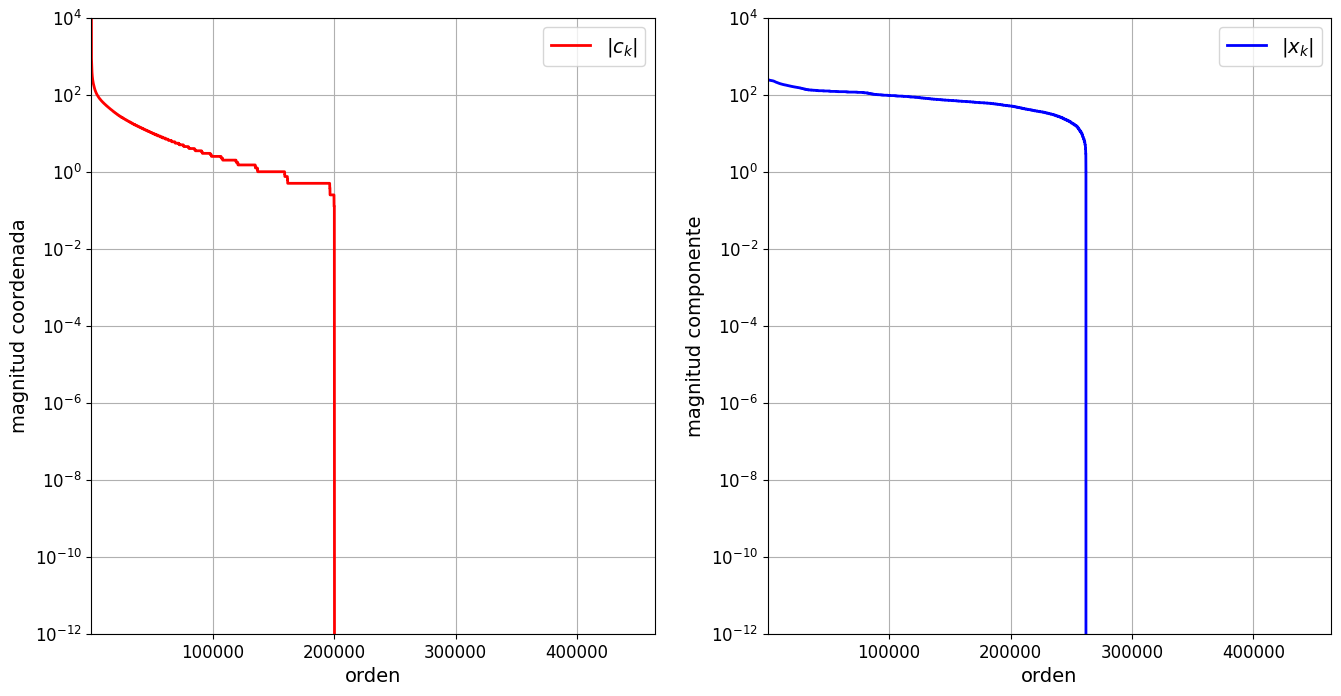

In [10]:
# índices
n = np.linspace(1, N ** 2, N ** 2)
# coordenadas en la base de wavelets de Haar ordenados por magnitud decreciente
wx_sort = np.flipud(np.sort(np.abs(WX).ravel()))
# valores de la imagen ordenadas por magnitud decreciente
x_sort = np.flipud(np.sort(np.abs(X).ravel()))

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(n, wx_sort, label='$|c_k|$', linewidth=2, color='r')
plt.xlim([ 1, num_t ])
plt.ylim([ 1E-12, 1E4 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('orden', fontsize=14)
plt.ylabel('magnitud coordenada', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.yscale('log')
plt.subplot(1, 2, 2)
plt.plot(n, x_sort, label='$|x_k|$', linewidth=2, color='b')
plt.xlim([ 1, num_t ])
plt.ylim([ 1E-12, 1E4 ])
plt.grid(True)
plt.legend(fontsize=14, loc='upper right')
plt.xlabel('orden', fontsize=14)
plt.ylabel('magnitud componente', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.yscale('log')
plt.show()